In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df= pd.read_csv (r"C:\Users\user\Desktop\customer_segmentation\Mall_Customers.csv")
df.head(50)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [17]:
df.shape


(200, 5)

In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [20]:
x = df.iloc[: , [3,4]].values

In [21]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [40]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans 
wcss =[]


In [54]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

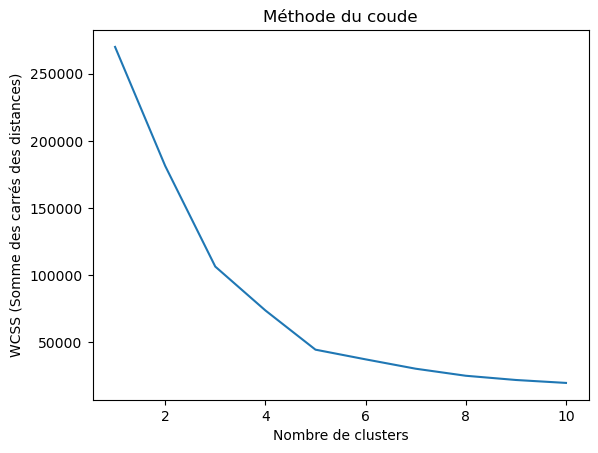

In [53]:
plt.plot(range(1, 11), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS (Somme des carrés des distances)')
plt.show()


In [72]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
kmeans.fit(x)
y_Kmeans = kmeans.fit_predict(x)



TypeError: agg function failed [how->mean,dtype->object]

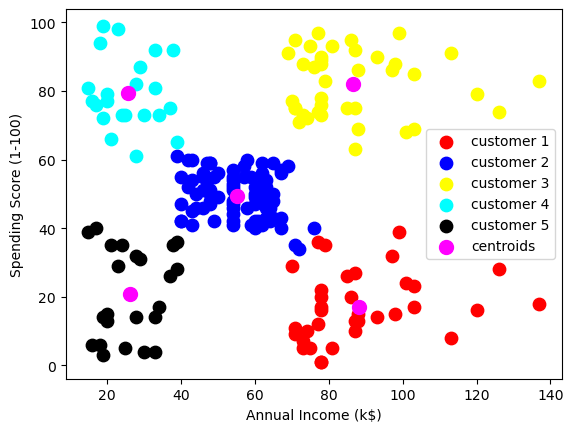

In [74]:
plt.scatter(x[y_Kmeans == 0,0], x[y_Kmeans == 0,1] , s=80, c="red" , label='customer 1')
plt.scatter(x[y_Kmeans == 1,0], x[y_Kmeans == 1,1] , s=80, c="blue" , label='customer 2')
plt.scatter(x[y_Kmeans == 2,0], x[y_Kmeans == 2,1] , s=80, c="yellow" , label='customer 3')
plt.scatter(x[y_Kmeans == 3,0], x[y_Kmeans == 3,1] , s=80, c="cyan" , label='customer 4')
plt.scatter(x[y_Kmeans == 4,0], x[y_Kmeans == 4,1] , s=80, c="black" , label='customer 5')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], s=100, c='magenta', label='centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [64]:
print(df.groupby('Cluster').mean())


TypeError: agg function failed [how->mean,dtype->object]